# Capstone Project - DermaSeer

After performing the dataset processing stage, the next step is the modeling process. Where the data used to build the model is training data stored in the normalization-train folder, validation data stored in the normalization-validation folder, and testing data stored in the test folder.

# 1. Import Library

In [1]:
import os  # Handles operating system-related tasks like file and directory operations
import shutil  # Provides functions to copy, move, and delete files or directories
from collections import defaultdict  # Creates dictionaries with default values
from tensorflow.keras import layers, models  # Defines neural network layers for deep learning models, constructs and manages neural network models
from tensorflow.keras.optimizers import RMSprop  # Applies the RMSprop optimization algorithm for training
from tensorflow.keras.callbacks import LearningRateScheduler  # Dynamically adjusts the learning rate during training
from tensorflow.keras import regularizers  # Adds regularization to model layers to reduce overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generates batches of tensor image data with real-time data augmentation
import matplotlib.pyplot as plt  # Visualizes data with plots, graphs, and charts
from tensorflow.keras.applications import MobileNet  # Imports the pre-trained MobileNet model for image classification tasks, enabling transfer learning or feature extraction
import numpy as np  # Used for array manipulation and numerical operations
from tensorflow.keras.preprocessing import image  # Provides functions to load, preprocess, and convert images into the appropriate format for deep learning models
from IPython.display import display, Image, clear_output  # Allows displaying images and outputs in Jupyter Notebook
from tensorflow.keras.models import load_model  # Loads a pre-trained model from a file

# 2. Fireplace Folder Dataset

At this stage, copies folders from "normalization-images" (e.g., normalization-train, normalization-validation) to new folders (data-train, data-validation) using shutil.copytree(). It also consolidates files from subfolders in the "test" folder into a single "data-test" folder for easier data access during modeling.

Befotre: 
<pre>
normalization-images/
├── normalization-train/
│   ├── file1.jpg
│   ├── file2.jpg
│   └── ...
├── normalization-validation/
│   ├── file3.jpg
│   ├── file4.jpg
│   └── ...
test/
├── subfolder1/
│   ├── file5.jpg
│   ├── file6.jpg
│   └── ...
├── subfolder2/
│   ├── file7.jpg
│   ├── file8.jpg
│   └── ...
</pre>

After:
<pre>
current_directory/
├── data-train/
│   ├── file1.jpg
│   ├── file2.jpg
│   └── ...
├── data-validation/
│   ├── file3.jpg
│   ├── file4.jpg
│   └── ...
├── data-test/
│   ├── file5.jpg
│   ├── file6.jpg
│   ├── file7.jpg
│   ├── file8.jpg
│   └── ...
</pre>

In [2]:
# specify source folder path and destination
source_folder = 'normalization-images'  # source folder
destination = '.'  # destination directory (current directory)

# folders to copy and their corresponding destination names
folders_to_copy = {
    'normalization-train': 'data-train', 
    'normalization-validation': 'data-validation'
}

# copy each folder
for source_folder_name, dest_folder_name in folders_to_copy.items():
    source_path = os.path.join(source_folder, source_folder_name)
    destination_path = os.path.join(destination, dest_folder_name)
    
    # copy the folder
    if os.path.exists(source_path):
        shutil.copytree(source_path, destination_path)
        print(f"Folder {source_folder_name} Has Been Copied To {destination_path}")
    else:
        print(f"Folder {source_folder_name} Not Found In {source_folder}")

Folder normalization-train Has Been Copied To ./data-train
Folder normalization-validation Has Been Copied To ./data-validation


In [3]:
# specify the source and destination folders
source_folder = 'test'  # the folder containing subfolders
destination = 'data-test'  # the folder where data should be copied

# create the destination folder if it doesn't exist
if not os.path.exists(destination):
    os.makedirs(destination)

# loop through all subfolders in the source folder
for subfolder in os.listdir(source_folder):
    subfolder_path = os.path.join(source_folder, subfolder)
    
    # check if it's a folder
    if os.path.isdir(subfolder_path):
        # loop through all files in the subfolder
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            
            # check if it's a file and copy it to the destination folder
            if os.path.isfile(file_path):
                destination_path = os.path.join(destination, file)
                shutil.copy(file_path, destination_path)

# print 'All Completed' after all files have been processed
print("All Completed")

All Completed


# 3. Labelling Dataset

At this stage, processes image data stored in data-train, data-validation, and data-test folders by categorizing images based on labels in their filenames. It groups images by label into a dictionary and moves each image to the corresponding label subfolder. If a label subfolder doesn't exist, it is created.

In [4]:
# specify dataset folders (folders are in the same directory as the script)
folders = ['data-train', 'data-validation', 'data-test']

# dictionary to store images by class
class_dict = defaultdict(list)

# process each dataset folder
for folder in folders:
    # path directly to the folder that is in the same directory as the script
    folder_path = folder  # since the folder is already in the same directory, just use the folder name directly
    
    # process each image in the folder
    for image in os.listdir(folder_path):
        if image.endswith(('.jpg', '.JPG', '.png', '.jfif')):  # only process image files
            # get the text after the last underscore
            label_part = image.split('_')[-1]
            
            # check if the second character is a digit, if so, take only the first character
            if len(label_part) > 1 and label_part[1].isdigit():
                label = label_part[0]  # only take the first character
            else:
                label = label_part[:2]  # take the first two characters if both are letters
            
            # store the image in the dictionary by label and folder
            class_dict[label].append(os.path.join(folder, image))

# generate the class_dict to check the labeling result
# print the dictionary to see the images by label
for label, images in class_dict.items():
    print(f"Label: {label}")
    print(f"Number of images: {len(images)}")
    print("Image paths:")
    for img in images:
        print(f"  - {img}")
    print("-" * 50)

Label: f
Number of images: 318
Image paths:
  - data-train/Normalized_Augmented_3_resized_f48.JPG
  - data-train/Normalized_Augmented_4_resized_f70.JPG
  - data-train/Normalized_Augmented_4_resized_f58.JPG
  - data-train/Normalized_Augmented_0_resized_f31.JPG
  - data-train/Normalized_Augmented_0_resized_f25.JPG
  - data-train/Normalized_Augmented_3_resized_f3.JPG
  - data-train/Normalized_Augmented_2_resized_f39.JPG
  - data-train/Normalized_Augmented_2_resized_f11.JPG
  - data-train/Normalized_Augmented_2_resized_f7.JPG
  - data-train/Normalized_Augmented_1_resized_f40.JPG
  - data-train/Normalized_Augmented_1_resized_f54.JPG
  - data-train/Normalized_Augmented_1_resized_f68.JPG
  - data-train/Normalized_Augmented_1_resized_f55.JPG
  - data-train/Normalized_Augmented_2_resized_f6.JPG
  - data-train/Normalized_Augmented_1_resized_f41.JPG
  - data-train/Normalized_Augmented_2_resized_f10.JPG
  - data-train/Normalized_Augmented_3_resized_f2.JPG
  - data-train/Normalized_Augmented_0_resi

In [5]:
# specify dataset folders (folders are in the same directory as the script)
folders = ['data-train', 'data-validation', 'data-test']

# dictionary to store images by class
class_dict = defaultdict(list)

# process each dataset folder
for folder in folders:
    folder_path = folder  # since the folder is already in the same directory, just use the folder name directly
    
    # process each image in the folder
    for image in os.listdir(folder_path):
        if image.endswith(('.jpg', '.JPG', '.png', '.jfif')):  # only process image files
            # get the text after the last underscore
            label_part = image.split('_')[-1]
            
            # check if the second character is a digit, if so, take only the first character
            if len(label_part) > 1 and label_part[1].isdigit():
                label = label_part[0]  # only take the first character
            else:
                label = label_part[:2]  # take the first two characters if both are letters
            
            # add the image to the class_dict
            class_dict[label].append(os.path.join(folder, image))

# now, move the images into their respective label folders
for label, images in class_dict.items():
    for folder in folders:
        # create label directory inside each folder if it doesn't exist
        label_folder_path = os.path.join(folder, label)
        if not os.path.exists(label_folder_path):
            os.makedirs(label_folder_path)

        # move each image to the corresponding label folder
        for image_path in images:
            # check if the image is in the current folder being processed
            if image_path.startswith(folder):
                # move the image to the label folder inside the dataset folder
                image_name = os.path.basename(image_path)
                destination_path = os.path.join(label_folder_path, image_name)
                shutil.move(image_path, destination_path)
                print(f"Moved {image_name} to {label_folder_path}")

# print to verify the labeling and the move operation
for folder in folders:
    print(f"\nContents of {folder}:")
    for label in os.listdir(folder):
        label_folder_path = os.path.join(folder, label)
        if os.path.isdir(label_folder_path):
            print(f"  {label}: {len(os.listdir(label_folder_path))} images")

Moved Normalized_Augmented_3_resized_f48.JPG to data-train/f
Moved Normalized_Augmented_4_resized_f70.JPG to data-train/f
Moved Normalized_Augmented_4_resized_f58.JPG to data-train/f
Moved Normalized_Augmented_0_resized_f31.JPG to data-train/f
Moved Normalized_Augmented_0_resized_f25.JPG to data-train/f
Moved Normalized_Augmented_3_resized_f3.JPG to data-train/f
Moved Normalized_Augmented_2_resized_f39.JPG to data-train/f
Moved Normalized_Augmented_2_resized_f11.JPG to data-train/f
Moved Normalized_Augmented_2_resized_f7.JPG to data-train/f
Moved Normalized_Augmented_1_resized_f40.JPG to data-train/f
Moved Normalized_Augmented_1_resized_f54.JPG to data-train/f
Moved Normalized_Augmented_1_resized_f68.JPG to data-train/f
Moved Normalized_Augmented_1_resized_f55.JPG to data-train/f
Moved Normalized_Augmented_2_resized_f6.JPG to data-train/f
Moved Normalized_Augmented_1_resized_f41.JPG to data-train/f
Moved Normalized_Augmented_2_resized_f10.JPG to data-train/f
Moved Normalized_Augmented_

#  4. Modeling Data with CNN Using MobileNet Transfer Learning

This section sets up a deep Convolutional Neural Network (CNN) for image classification using the MobileNet architecture with transfer learning. The workflow includes data preparation, model architecture setup, compilation, training, and evaluation. It leverages ImageDataGenerator for efficient data handling and trains a model fine-tuned on a pre-trained MobileNet backbone. Regularization techniques such as Dropout and Batch Normalization are employed for better generalization, and learning rate scheduling is used for optimized training.

**A. Data Preparation and Generator Setup**

This step involves configuring data generators to preprocess and augment image data for training, validation, and testing:

1. Training Data Generator:
Uses augmentation techniques such as rescaling, rotation, width and height shifts, shearing, zooming, brightness adjustment, horizontal flips, and nearest-neighbor filling for increased diversity in training images.

2. Validation and Test Data Generators:
These generators only rescale images to normalize pixel values for evaluation consistency.

3. Data Flow:
Data is loaded from directory structures (`data-train`, `data-validation`, `data-test`) into batches, resized to `224x224`, and categorized based on the subdirectory labels.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for validation and test without augmentation
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for train, validation, and test datasets
train_generator = train_datagen.flow_from_directory(
    'data-train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    'data-validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'data-test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1110 images belonging to 5 classes.
Found 415 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


**B. CNN Model Architecture**

This part defines a CNN model for image classification using transfer learning with MobileNet:

1. Base Model:
MobileNet, pre-trained on ImageNet, is loaded without the top classification layers (`include_top=False`). All layers except the last 50 are frozen to retain previously learned features.

2. Custom Layers:
- GlobalAveragePooling2D: Reduces the spatial dimensions of feature maps.
- Dense Layer: Adds a fully connected layer with 128 units and ReLU activation.
- Dropout: Prevents overfitting by randomly deactivating 40% of neurons during training.
- Output Layer: Softmax activation for multi-class classification, with the number of output nodes equal to the number of classes.

In [48]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load MobileNet model pre-trained on ImageNet, exclude top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except the last 50
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

**C. Model Compilation and Training**

In this stage, the model is prepared for training through compilation, followed by the training process using data generators and callbacks to optimize performance and prevent overfitting:

1. Compilation:
- Optimizer: RMSprop with a learning rate of 0.0001 for adaptive learning.
- Loss Function: Categorical cross-entropy for multi-class classification tasks.
- Metrics: Tracks accuracy during training and validation.

2. Training:
- Early Stopping Callback: Monitors validation loss, stopping training if it does not improve for 10 epochs, while restoring the best model weights.
- ReduceLROnPlateau Callback: Reduces the learning rate by half if validation loss does not improve after 5 epochs, ensuring training stability.
- The model is trained for up to 50 epochs using the `train_generator` and validated with `val_generator`.

3. Output:
- Training history, including accuracy and loss, can be plotted to visualize performance.
- The trained model is ready for evaluation on unseen data in the `test_generator`.

In [49]:
# print the model summary (optional)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,360,709 (12.82 MB)

 Trainable params: 3,204,613 (12.22 MB)

 Non-trainable params: 156,096 (609.75 KB)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile model
model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 563ms/step - accuracy: 0.3598 - loss: 1.7590 - val_accuracy: 0.2964 - val_loss: 2.3336 - learning_rate: 1.0000e-04
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 556ms/step - accuracy: 0.5509 - loss: 1.1060 - val_accuracy: 0.3566 - val_loss: 2.2092 - learning_rate: 1.0000e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 555ms/step - accuracy: 0.6699 - loss: 0.8982 - val_accuracy: 0.4940 - val_loss: 1.7228 - learning_rate: 1.0000e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 563ms/step - accuracy: 0.6813 - loss: 0.7831 - val_accuracy: 0.5373 - val_loss: 1.4056 - learning_rate: 1.0000e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 563ms/step - accuracy: 0.7556 - loss: 0.7066 - val_accuracy: 0.5783 - val_loss: 1.4019 - learning_rate: 1.0000e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 558ms/step - accuracy: 0.7552 - loss: 0.6944 - val_accuracy: 0.6819 - val_loss: 1.0017 - learning_rate: 1.0000e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 559ms/step - acc

**D. Plotting Model Accuracy and Loss**

The code visualizes the model's training progress by plotting accuracy and loss for both training and validation datasets across epochs, helping to assess model performance and generalization.

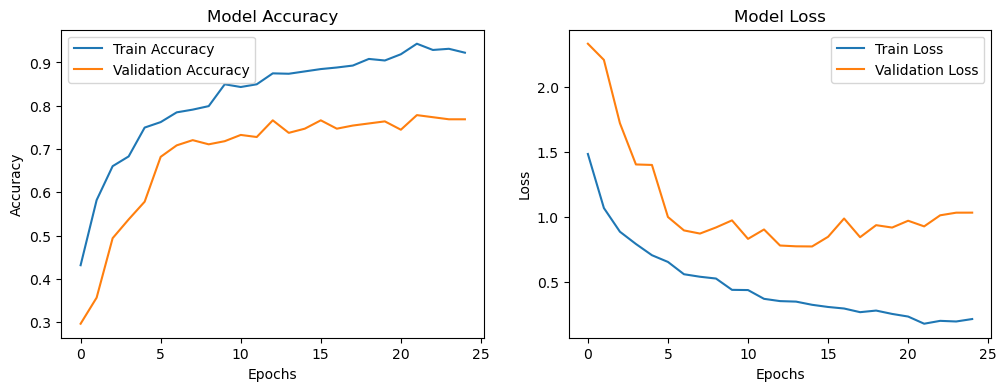

In [51]:
# plot accuracy and loss
plt.figure(figsize=(12, 4))

# plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**E. Model Evaluation on Test Data**

The code evaluates the trained model on the test data and prints the test accuracy as a percentage, helping to assess the model's performance on unseen data.

In [71]:
# evaluate the model on the test data
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.8125 - loss: 0.7718
Test Accuracy: 81.25%


**F. Model Evaluation Summary**

The code prints a summary of the model's performance, showing the final training accuracy, validation accuracy, and test accuracy as percentages, providing an overview of how well the model performed during training and on unseen data.

In [72]:
# summary of model evaluation
print("\nModel Evaluation Summary:")

print(f"Final Train Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")


Model Evaluation Summary:
Final Train Accuracy: 92.25%
Final Validation Accuracy: 76.87%
Final Test Accuracy: 81.25%


**G. Saving Model**

The code saves the trained model to a file named 'model-dermaseer.keras' and prints a confirmation message to indicate the model has been successfully saved.

In [73]:
# save the model to a file using Keras
model.save('model-dermaseer-mobilenet.keras')

# print a message to confirm the model has been saved successfully
print("Model has been saved as 'model-dermaseer-mobilenet.keras' using Keras")

Model has been saved as 'model-dermaseer-mobilenet.keras' using Keras


# 5. Prediction

At this stage, the acne type prediction process is carried out using the trained model. The code defines a function `predict_acne_type` to preprocess the uploaded image, make predictions, and display the results along with probabilities for each acne type. The code uses `ipywidgets` to create a simple interactive file upload widget where users can upload images. Once uploaded, the image is processed, predictions are made, and the results are displayed.

In [74]:
# check class indices after creating the train_generator
print("Class indices:", train_generator.class_indices)

Class indices: {'f': 0, 'fu': 1, 'n': 2, 'p': 3, 'pa': 4}


In [75]:
# mapping class from index to class name
class_indices = {0: 'f', 1: 'fu', 2: 'n', 3: 'p', 4: 'pa'}

def predict_acne_type(img_path, model):
    # load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # size should match the model input size
    img_array = image.img_to_array(img)  # convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
    img_array /= 255.0  # normalize according to the scale used during training

    # make predictions
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])  # get the index with the highest probability
    predicted_class_label = class_indices[predicted_class_index]  # convert index to class label

    # print the prediction result
    print(f"Prediction Result: {predicted_class_label} With Probability {predictions[0][predicted_class_index]:.2f}")

In [1]:
import numpy as np
import requests
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from io import BytesIO
from PIL import Image

# mapping class indices to descriptive labels for interpretation
class_indices = {0: 'f', 1: 'fu', 2: 'n', 3: 'p', 4: 'pa'}
class_labels = list(class_indices.values())

# detailed descriptions for each acne type
descriptions = {
    'f': 'Fulminans',
    'fu': 'Fungal',
    'n': 'Nodules',
    'p': 'Postula',
    'pa': 'Papula'
}

# function to predict acne type from an image URL
def predict_acne_type(img_url, model):
    try:
        # download the image from the provided URL
        response = requests.get(img_url)
        img = Image.open(BytesIO(response.content))  # Open the image using PIL

        # preprocess the image for model input
        img = img.resize((224, 224))  # Resize to MobileNet input size
        img_array = np.array(img)  # Convert image to a NumPy array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array)  # Normalize input for MobileNet

        # make predictions using the model
        predictions = model.predict(img_array)[0]  # Predict and extract probabilities
        predicted_class_index = np.argmax(predictions)  # Find the class with highest probability
        predicted_class_label = class_indices[predicted_class_index]  # Map index to class label

        # format the results as a dictionary with probabilities
        results = {class_labels[i]: float(predictions[i]) for i in range(len(predictions))}
        return predicted_class_label, results
    except Exception as e:
        # handle errors during image processing or prediction
        print(f'Error While Processing Image: {e}')
        return None, {}

# URL of the image to be predicted
img_url = 'https://asset.kompas.com/crop/25x6:625x406/750x500/data/photo/2018/10/02/4245588276.png'  # Replace with a valid image URL

# ensure the model is loaded beforehand
model = load_model('model-dermaseer-mobilenet.keras')  # Replace with the path to your trained model

# Predict and display the results
predicted_label, probabilities = predict_acne_type(img_url, model)

if predicted_label:
    # display the predicted acne type with a detailed description
    print(f'\nPredicted Acne Type: {descriptions[predicted_label]}')
    print('\nThe Highest Probabilities:')

    # highlight the highest probability in blue and bold
    highest_prob = max(probabilities.values())
    for acne_type, prob in probabilities.items():
        label = class_indices[class_labels.index(acne_type)]
        description = descriptions[label]

        if prob == highest_prob:
            print(f'  \033[1;34m{description}: {prob:.2f}\033[0m')  # Display the highest probability in blue and bold

    # display all probabilities
    print('\nProbabilities:')
    for acne_type, prob in probabilities.items():
        label = class_indices[class_labels.index(acne_type)]
        description = descriptions[label]

        if prob != highest_prob:
            print(f'  {description}: {prob:.2f}')
else:
    # handle failed prediction
    print('Prediction failed.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

Predicted Acne Type: Postula

The Highest Probabilities:
  Postula: 0.64

Probabilities:
  Fulminans: 0.05
  Fungal: 0.09
  Nodules: 0.02
  Papula: 0.20
